# Unit 5 - Financial Planning

In [22]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url_json = btc_url + "?format=json"
btc_response = requests.get(btc_url_json)

import json
btc_response_json = btc_response.json()
#print(json.dumps(btc_response_json, indent=4)) #Read and format json data to locate btc price
btc_price = btc_response_json['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_url_json = eth_url + "?format=json"
eth_response = requests.get(eth_url_json)

eth_response_json = eth_response.json()
#print(json.dumps(eth_response_json, indent=4)) #Read and format json data to locate eth price
eth_price = eth_response_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57582.00
The current value of your 5.3 ETH is $19192.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Re-confirm if both keys are loaded properly
#print(type(alpaca_api_key))
#print(type(alpaca_secret_key))

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-09-14 00:00:00-04:00  116.07  116.38  116.07  116.28  4036304  448.12   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-14 00:00:00-04:00  448.34  443.22  444.18  67959711

In [9]:
# Pick AGG and SPY close prices

# Create empty Data Frame to store closing prices
df_closing_prices = pd.DataFrame()

# Adding closing price to empty Data Frame by looping through tickers
for each_ticker in tickers:
    df_closing_prices[each_ticker] = df_portfolio[each_ticker]["close"]
df_closing_prices 

agg_close_price = df_closing_prices.iat[0,0]
spy_close_price = df_closing_prices.iat[0,1]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.28
Current SPY closing price: $444.18


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22209.00
The current value of your 200 AGG shares is $23256.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_value_crypto = my_eth_value + my_eth_value
total_value_shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({'Amount': [total_value_crypto, total_value_shares]},index=['Crypto','Shares'])


# Display savings DataFrame
df_savings

Amount
Crypto  38384.508
Shares  45465.000

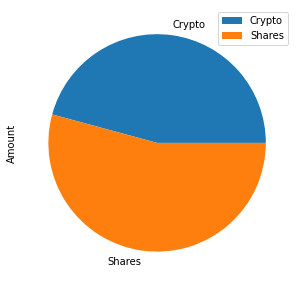

In [12]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y='Amount', figsize=(5,5))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_value_crypto + total_value_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulation! You have enough money in the fund")
elif total_savings == emergency_fund:
    print("Congratulation! You reached your financial goal")
else:
    print(f"Oh no!! You need an additional ${emergency_fund - total_savings} to reach yoru goal")

Congratulation! You have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years= MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1           2          3           4           5    \
0      1.000000   1.000000    1.000000   1.000000    1.000000    1.000000   
1      0.989765   1.000596    0.997349   0.996675    0.992429    1.005902   
2      0.997660   0.991028    0.999021   1.009434    0.994741    1.006621   
3      0.996983   0.996737    0.997563   1.005273    0.984323    1.011186   
4      1.002396   1.008928    0.994460   0.997195    0.992575    1.018637   
...         ...        ...         ...        ...         ...         ...   
7556  76.777501  51.181484  133.342586  42.079208  187.374088  103.219810   
7557  77.171425  51.386287  133.931201  42.115833  187.622914  103.416818   
7558  76.471583  51.284783  133.865195  42.146977  187.558797  102.716884   
7559  76.090646  51.548758  132.444059  42.151566  187.222413  103.502969   
7560  75.959474  51.451230  132.368498  41.997231  185.941581  103.166390   

            6           7          8           9    ...         490  \
0      1.000000    1.000000   1.000000    1.000000  ...    1.000000   
1      0.994633    1.001831   0.991726    1.003262  ...    0.998495   
2      0.991539    1.010064   0.986446    0.999631  ...    0.998814   
3      0.984755    1.003988   0.982594    1.003213  ...    0.998585   
4      0.987672    1.010002   0.977819    1.010302  ...    0.996014   
...         ...         ...        ...         ...  ...         ...   
7556  80.127549  105.168743  52.413578  147.022914  ...  132.605301   
7557  80.344784  105.201013  51.903170  146.492206  ...  133.236973   
7558  80.388467  105.213751  51.832903  146.573034  ...  134.131587   
7559  80.863225  103.929288  51.527010  146.586381  ...  133.393617   
7560  81.283274  104.041569  51.573520  146.414776  ...  133.748710   

             491         492         493         494        495         496  \
0       1.000000    1.000000    1.000000    1.000000   1.000000    1.000000   
1       1.005556    0.996018    0.992736    1.003282   1.005059    0.998243   
2       1.011493    1.000167    0.995434    0.990407   1.006728    0.995765   
3       1.008883    0.992561    0.983492    0.993435   1.005506    1.004607   
4       0.997025    1.000878    0.984591    0.996433   1.006928    0.999289   
...          ...         ...         ...         ...        ...         ...   
7556  134.768704  160.753091  155.914162  135.572008  96.585350  162.169634   
7557  133.639542  161.179305  156.726010  135.571833  96.554274  163.473403   
7558  133.543595  160.774069  157.217492  136.238000  96.299496  162.858459   
7559  133.157563  161.266836  156.787601  135.634163  96.268830  163.076319   
7560  133.778968  162.267039  156.615237  135.788705  96.868576  162.096383   

            497        498         499  
0      1.000000   1.000000    1.000000  
1      1.000409   1.007662    0.997376  
2      0.998165   1.006507    0.993591  
3      0.997189   1.005110    0.989963  
4      0.999583   0.997552    0.983525  
...         ...        ...         ...  
7556  89.243994  37.062885  125.802817  
7557  90.242211  37.199071  125.667758  
7558  90.532400  37.320448  126.385325  
7559  90.517534  37.375432  127.103626  
7560  90.880289  37.303621  127.486042  

[7561 rows x 500 columns]

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# SEE ABOVE

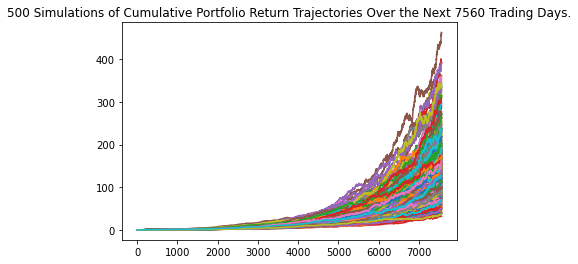

In [24]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()

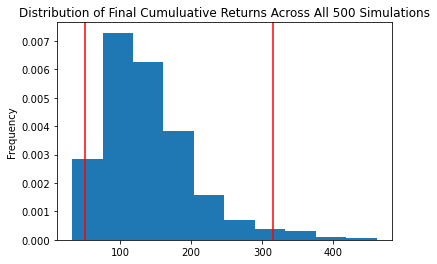

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(sum_stat)

count           500.000000
mean            139.517238
std              65.292782
min              32.504829
25%              93.156106
50%             128.518079
75%             170.468586
max             460.641213
95% CI Lower     49.988939
95% CI Upper    315.004290
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stat[8]*initial_investment,2)
ci_upper = round(sum_stat[9]*initial_investment,2)

# Print results
# WHY MY NUMBERS LOOK SO FUNNY? CAN YOU PLEASE CHECK AND LET ME KNOW?
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $999778.77 and $6300085.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower1 = round(sum_stat[8]*initial_investment1,2)
ci_upper1 = round(sum_stat[9]*initial_investment1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1499668.16 and $9450128.69


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")